In [1]:
import pandas as pd

In [4]:
# Load the dataset
df = pd.read_csv("C:\\Users\\kotte\\Downloads\\online_retail_II.csv", low_memory=False)

In [5]:

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

In [6]:
# Drop rows with missing or invalid timestamps
df = df.dropna(subset=['InvoiceDate'])

In [7]:
# Extract time features
df['Hour'] = df['InvoiceDate'].dt.hour
df['Day'] = df['InvoiceDate'].dt.date

In [8]:
# Group by hour to simulate transaction load over a day
hourly_transactions = df.groupby('Hour').size().reset_index(name='Transaction_Count')


In [9]:
import numpy as np

# Simulate edge latency reduction: 
# Apply 20% latency reduction for hours above average transaction load, else 5%
avg_volume = hourly_transactions['Transaction_Count'].mean()

hourly_transactions['Edge_Latency_Reduction (%)'] = np.where(
    hourly_transactions['Transaction_Count'] > avg_volume,
    20,   # Peak load → Edge saves more
    5     # Non-peak → Less impact
)


C:\Users\kotte\AppData\Local\Temp\ipykernel_17440\941357927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Transaction_Count', data=hourly_transactions, palette='Blues_d')


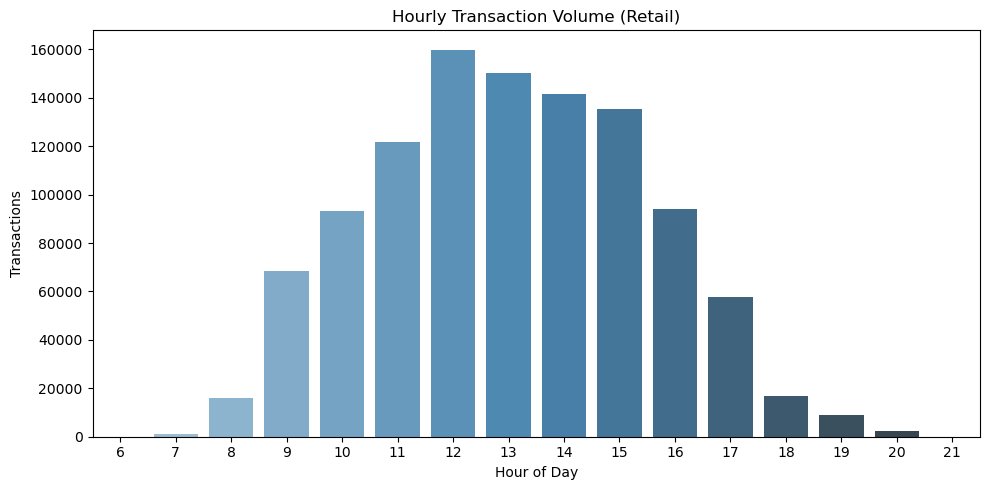

In [11]:
# Step 4: Plot Transaction Volume and Save
plt.figure(figsize=(10, 5))
sns.barplot(x='Hour', y='Transaction_Count', data=hourly_transactions, palette='Blues_d')
plt.title('Hourly Transaction Volume (Retail)')
plt.xlabel('Hour of Day')
plt.ylabel('Transactions')
plt.tight_layout()
plt.savefig("retail_hourly_transaction_volume.png")  # Save image
plt.show()



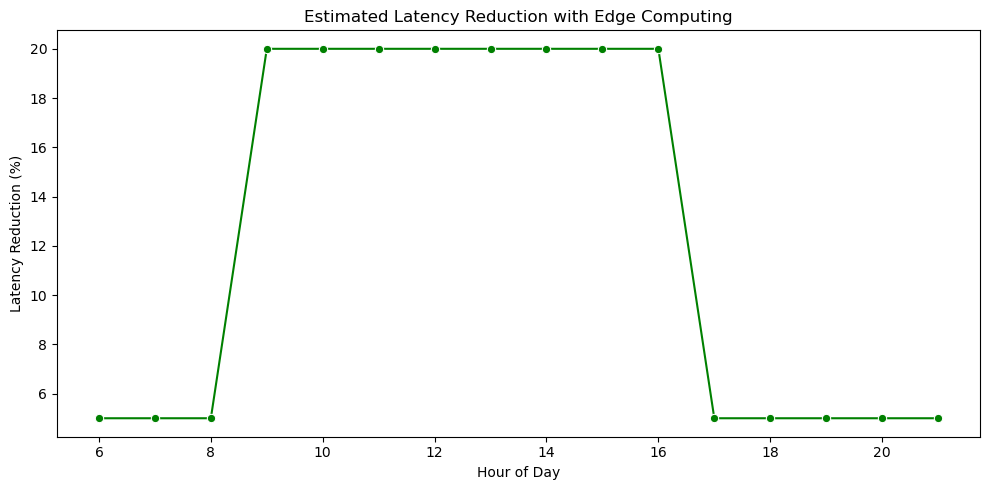

In [13]:
# Step 5: Plot Latency Reduction Estimate and Save 
plt.figure(figsize=(10, 5))
sns.lineplot(x='Hour', y='Edge_Latency_Reduction (%)', data=hourly_transactions, marker='o', color='green')
plt.title('Estimated Latency Reduction with Edge Computing')
plt.xlabel('Hour of Day')
plt.ylabel('Latency Reduction (%)')
plt.tight_layout()
plt.savefig("retail_edge_latency_reduction.png")  # Save updated image
plt.show()


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load dataset
df = pd.read_csv("C:\\Users\\kotte\\Downloads\\smart_classroom_dataset.csv")

In [16]:
# Step 1: Clean and convert necessary columns
df = df.dropna(subset=['Engagement_Score', 'Feedback_Time (ms)', 'Temperature (°C)', 'Classroom_Noise (dB)'])

In [17]:
df['Feedback_Time (ms)'] = pd.to_numeric(df['Feedback_Time (ms)'], errors='coerce')
df['Engagement_Score'] = pd.to_numeric(df['Engagement_Score'], errors='coerce')
df['Classroom_Noise (dB)'] = pd.to_numeric(df['Classroom_Noise (dB)'], errors='coerce')

In [18]:
# Step 2: Categorize noise levels to simulate environmental stress
df['Noise_Level'] = pd.cut(df['Classroom_Noise (dB)'], bins=[0, 40, 70, 100], labels=['Low', 'Moderate', 'High'])

In [19]:
# Step 3: Compute average engagement and feedback time per noise level
feedback_by_noise = df.groupby('Noise_Level')[['Feedback_Time (ms)', 'Engagement_Score']].mean().reset_index()

C:\Users\kotte\AppData\Local\Temp\ipykernel_17440\2854913497.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feedback_by_noise = df.groupby('Noise_Level')[['Feedback_Time (ms)', 'Engagement_Score']].mean().reset_index()


C:\Users\kotte\AppData\Local\Temp\ipykernel_17440\1105323936.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Noise_Level', y='Feedback_Time (ms)', data=feedback_by_noise, palette='Reds')


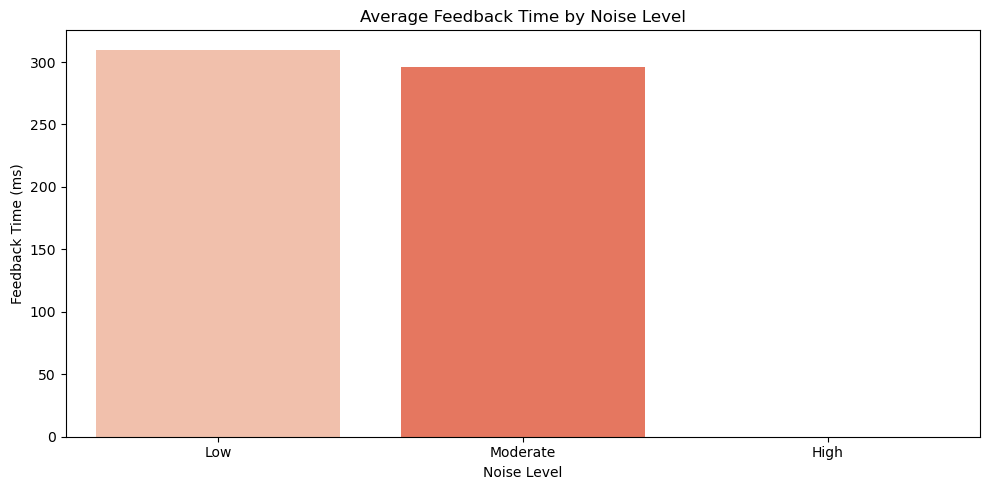

In [20]:
# Step 4: Plot and save
plt.figure(figsize=(10, 5))
sns.barplot(x='Noise_Level', y='Feedback_Time (ms)', data=feedback_by_noise, palette='Reds')
plt.title('Average Feedback Time by Noise Level')
plt.ylabel('Feedback Time (ms)')
plt.xlabel('Noise Level')
plt.tight_layout()
plt.savefig("healthcare_feedback_by_noise.png")
plt.show()

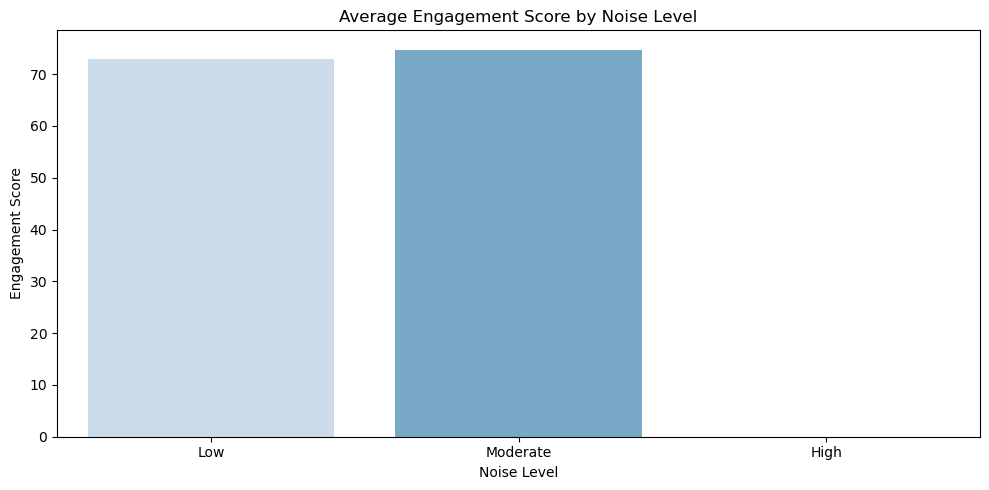

In [22]:
# Updated barplot to suppress future warning (for Engagement Score)
plt.figure(figsize=(10, 5))
sns.barplot(x='Noise_Level', y='Engagement_Score', hue='Noise_Level', data=feedback_by_noise, palette='Blues', legend=False)
plt.title('Average Engagement Score by Noise Level')
plt.ylabel('Engagement Score')
plt.xlabel('Noise Level')
plt.tight_layout()
plt.savefig("healthcare_engagement_by_noise.png")
plt.show()


In [23]:
import pandas as pd

# Load a small sample of the dataset
chunk_preview = pd.read_csv("C:\\Users\\kotte\\Downloads\\ML-EdgeIIoT-dataset.csv", nrows=500)

# Preview column names
print(chunk_preview.columns.tolist())


['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4', 'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum', 'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused', 'http.file_data', 'http.content_length', 'http.request.uri.query', 'http.request.method', 'http.referer', 'http.request.full_uri', 'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options', 'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msg', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.t

In [27]:
# Step 1: Load 'Attack_type' column in chunks to save memory
attack_counts = {}
chunksize = 100000  # Adjust this based on system memory

for chunk in pd.read_csv("C:\\Users\\kotte\\Downloads\\ML-EdgeIIoT-dataset.csv", usecols=["Attack_type"], chunksize=chunksize):
    counts = chunk["Attack_type"].value_counts().to_dict()
    for attack, count in counts.items():
        attack_counts[attack] = attack_counts.get(attack, 0) + count

In [28]:
# Step 2: Convert to DataFrame for analysis
df_attack_summary = pd.DataFrame(list(attack_counts.items()), columns=["Attack_type", "Count"])
df_attack_summary = df_attack_summary.sort_values(by="Count", ascending=False)

C:\Users\kotte\AppData\Local\Temp\ipykernel_17440\636803781.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_attack_summary, x="Attack_type", y="Count", palette="rocket")


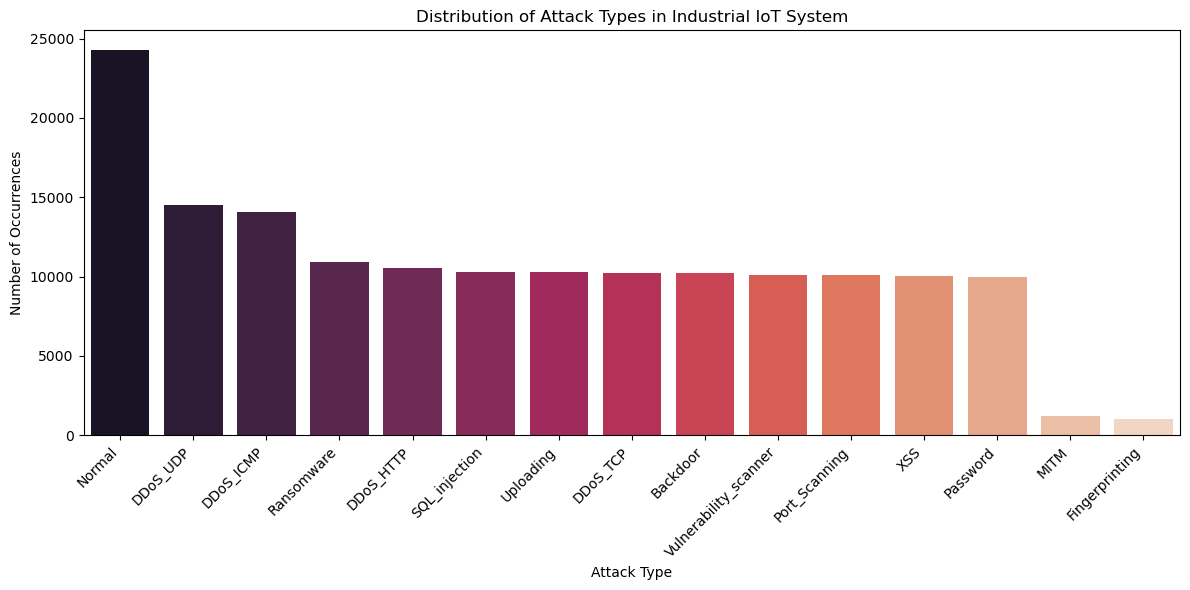

In [29]:

# Step 3: Visualize the attack distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=df_attack_summary, x="Attack_type", y="Count", palette="rocket")
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Attack Types in Industrial IoT System")
plt.xlabel("Attack Type")
plt.ylabel("Number of Occurrences")
plt.tight_layout()
plt.savefig("manufacturing_edge_attack_distribution.png")
plt.show()

In [30]:

# Use previously created attack summary
df_attack_latency = df_attack_summary.head(3).copy()

In [31]:
# Simulate detection latency in ms
df_attack_latency["Cloud_Latency"] = [400, 450, 380]  # ms
df_attack_latency["Edge_Latency"] = [100, 120, 90]     # ms

In [32]:
df_latency = df_attack_latency.melt(id_vars="Attack_type", 
                                    value_vars=["Cloud_Latency", "Edge_Latency"],
                                    var_name="System_Type", value_name="Latency_ms")

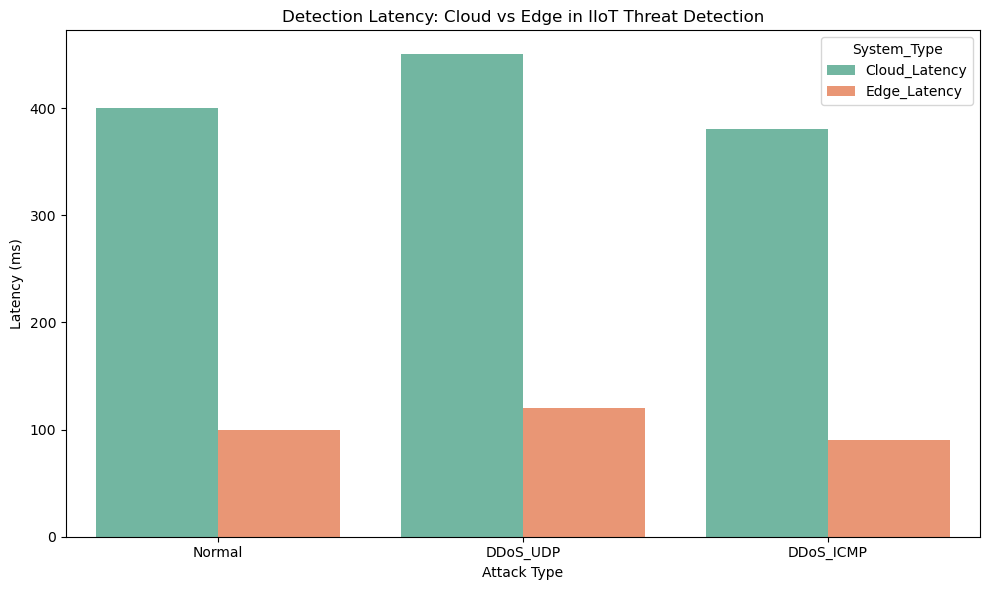

In [33]:

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_latency, x="Attack_type", y="Latency_ms", hue="System_Type", palette="Set2")
plt.title("Detection Latency: Cloud vs Edge in IIoT Threat Detection")
plt.ylabel("Latency (ms)")
plt.xlabel("Attack Type")
plt.tight_layout()
plt.savefig("manufacturing_latency_comparison.png")
plt.show()